In [153]:
import numpy as np
from scipy.sparse import csgraph
from scipy.integrate import solve_ivp
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.ndimage import laplace
from numpy.random import randint, rand

In [176]:
def spatial_PDE(N,b,k,p,T,I0,M=200):
    """
    A spatial PDE simulation that model time dependent variables: S, I, R
    
    N: N individuals the population has
    
    b: the number of interactions each day that could spread the disease (per individual)
    
    k: the fraction of the infectious population which recovers each day
    
    T: simulation time period
    
    I0: Initial positions of infectious individuals
    
    M: size of grid
    
    """
    def laplace_flat(A):
        A = A.reshape((M,M))
        return laplace(A).flatten()
        
    def f(t,v):
        """
        v = [S, I, R]
        
        """
        # print(v.shape)
        S = v[:M**2]
        I = v[M**2:-M**2]
        R = v[-M**2:]
        
        # derivatives
        dSdt = -b * S * I + p * laplace_flat(S)
        dIdt = b * S * I - k * I + p * laplace_flat(I)
        dRdt = k * I + p * laplace_flat(R)
        
        return np.concatenate([dSdt, dIdt, dRdt],axis=None)
    
    # get intial S0 and R0 from I0
    S0 = np.ones((M*M))-I0
    R0 = np.zeros((M*M))
    
    # solve_ivp only accept 1d initial value, so conbine 3 1d array to 1
    v0 = np.concatenate([S0,I0,R0],axis=None)
    
    t_span = [0,T]
    t_eval = list(range(T))
    sol = solve_ivp(f, t_span, v0, t_eval=t_eval)
    return sol

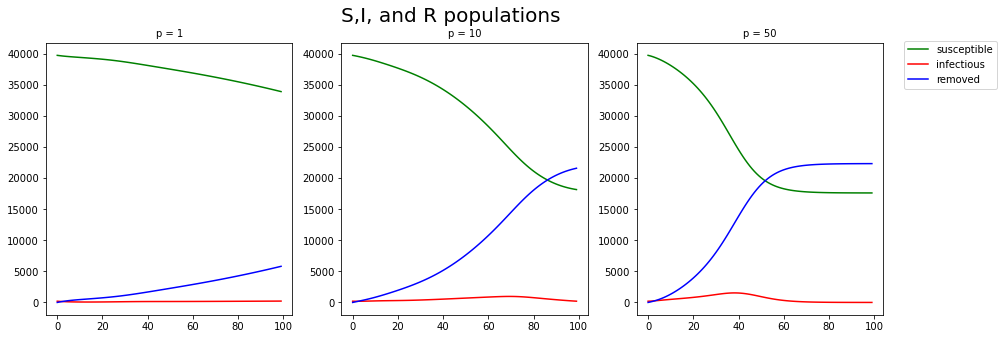

In [181]:
### infected individuals start at the center of the square

k = 0.4
b = 0.6

M = 200
T = 100
# grids with 1s and 0s, 1s are the infected
# i0 = M # number of the infected
# I0 = np.random.choice([1]*i0+[0]*(M*M-i0), size=(M**2), replace=False)
I0 = np.zeros((M,M))
midpart = (np.random.rand(20,20)>0.5)*1
I0[20:40,20:40] = midpart[:,:]
I0 = I0.flatten()
       

p_list = [1,10,50]
fig, ax = plt.subplots(1,len(p_list), figsize=(15,5))

fig.suptitle("S,I, and R populations",fontsize=20)

for i,p in enumerate(p_list):
        
    sol = spatial_PDE(N,b,k,p,T,I0,M)

    S = []
    I = []
    R = []
    for dayind in range(T):
        S.append(np.sum(sol.y[:,dayind][:M**2]))
        I.append(np.sum(sol.y[:,dayind][M**2:-M**2]))
        R.append(np.sum(sol.y[:,dayind][-M**2:]))

    ax[i].plot(list(range(T)), S, label="susceptible", c='g')
    ax[i].plot(list(range(T)), I, label="infectious", c='r')
    ax[i].plot(list(range(T)), R, label="removed", c='b')

    ax[i].set_title(f"p = {p}",fontsize=10)
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(1.01, 0.9),loc = 'upper right')

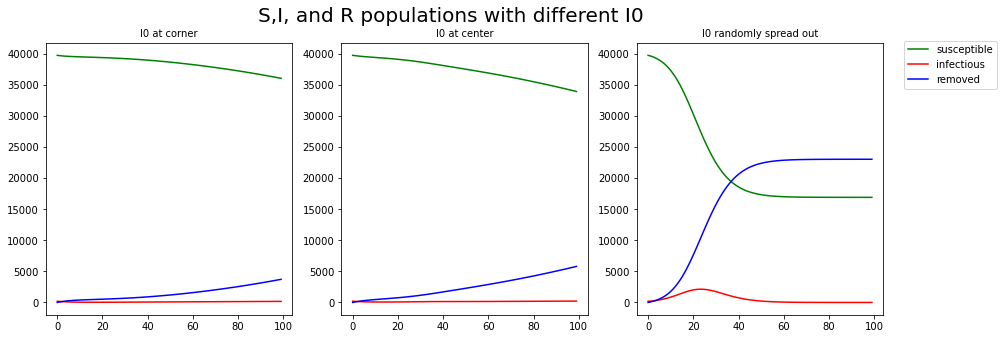

In [180]:
### compare between different I0

### infected individuals start at the center of the square

k = 0.4
b = 0.6
M = 200
T = 100
p = 1

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("S,I, and R populations with different I0",fontsize=20)

# grids with 1s and 0s, 1s are the infected

midpart = (np.random.rand(20,20)>0.5)*1
i0 = np.sum(midpart) # number of the infected

## 0
I0 = np.zeros((M,M))
I0[0:20,0:20] = midpart[:,:]
I0 = I0.flatten()       
        
sol = spatial_PDE(N,b,k,p,T,I0,M)

S = []
I = []
R = []
for dayind in range(T):
    S.append(np.sum(sol.y[:,dayind][:M**2]))
    I.append(np.sum(sol.y[:,dayind][M**2:-M**2]))
    R.append(np.sum(sol.y[:,dayind][-M**2:]))

ax[0].plot(list(range(T)), S, label="susceptible", c='g')
ax[0].plot(list(range(T)), I, label="infectious", c='r')
ax[0].plot(list(range(T)), R, label="removed", c='b')
ax[0].set_title(f"I0 at corner",fontsize=10)

## 1
I0 = np.zeros((M,M))
midpart = (np.random.rand(20,20)>0.5)*1
I0[20:40,20:40] = midpart[:,:]
I0 = I0.flatten()       
        
sol = spatial_PDE(N,b,k,p,T,I0,M)

S = []
I = []
R = []
for dayind in range(T):
    S.append(np.sum(sol.y[:,dayind][:M**2]))
    I.append(np.sum(sol.y[:,dayind][M**2:-M**2]))
    R.append(np.sum(sol.y[:,dayind][-M**2:]))

ax[1].plot(list(range(T)), S, label="susceptible", c='g')
ax[1].plot(list(range(T)), I, label="infectious", c='r')
ax[1].plot(list(range(T)), R, label="removed", c='b')
ax[1].set_title(f"I0 at center",fontsize=10)

## 2
I0 = np.random.choice([1]*i0+[0]*(M*M-i0), size=(M**2), replace=False)      
        
sol = spatial_PDE(N,b,k,p,T,I0,M)

S = []
I = []
R = []
for dayind in range(T):
    S.append(np.sum(sol.y[:,dayind][:M**2]))
    I.append(np.sum(sol.y[:,dayind][M**2:-M**2]))
    R.append(np.sum(sol.y[:,dayind][-M**2:]))

ax[2].plot(list(range(T)), S, label="susceptible", c='g')
ax[2].plot(list(range(T)), I, label="infectious", c='r')
ax[2].plot(list(range(T)), R, label="removed", c='b')
ax[2].set_title(f"I0 randomly spread out",fontsize=10)

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(1.01, 0.9),loc = 'upper right')


In [127]:
# k = 1
# b = 1

# M = 200
# N = 40000
# T = 100
# # grids with 1s and 0s, 1s are the infected
# i0 = 100 # number of the infected
# I0 = np.random.choice([1]*i0+[0]*(M*M-i0), size=(M**2), replace=False)
# # I0 = np.array([1]*M+[0]*(M*M-M))

# p = 1
        
# sol = spatial_PDE(N,b,k,p,T,I0,M)

# # print(sol.y.shape)
# # y has shape (M*M*3,T)
# # ith column is the 1d array contains the info of the ith day

# S = []
# I = []
# R = []
# for dayind in range(T):
#     S.append(sol.y[:,dayind][:M**2].reshape((M,M)))
#     I.append(sol.y[:,dayind][M**2:-M**2].reshape((M,M)))
#     R.append(sol.y[:,dayind][-M**2:].reshape((M,M)))
# S = np.array(S)
# I = np.array(I)
# R = np.array(R)

# # print(S)
# # print(I)
# # print(R)

# Sy = np.array(range(T))
# Iy = np.array(range(T))
# Ry = np.array(range(T))
# for i in range(T):
#     Sy[i] = np.sum(S[i])
#     Iy[i] = np.sum(I[i])
#     Ry[i] = np.sum(R[i])
    

In [148]:
# plt.plot(list(range(T)), Sy, label="susceptible", c='g')
# plt.plot(list(range(T)), Iy, label="infectious", c='r')
# plt.plot(list(range(T)), Ry, label="removed", c='b')
# plt.legend()


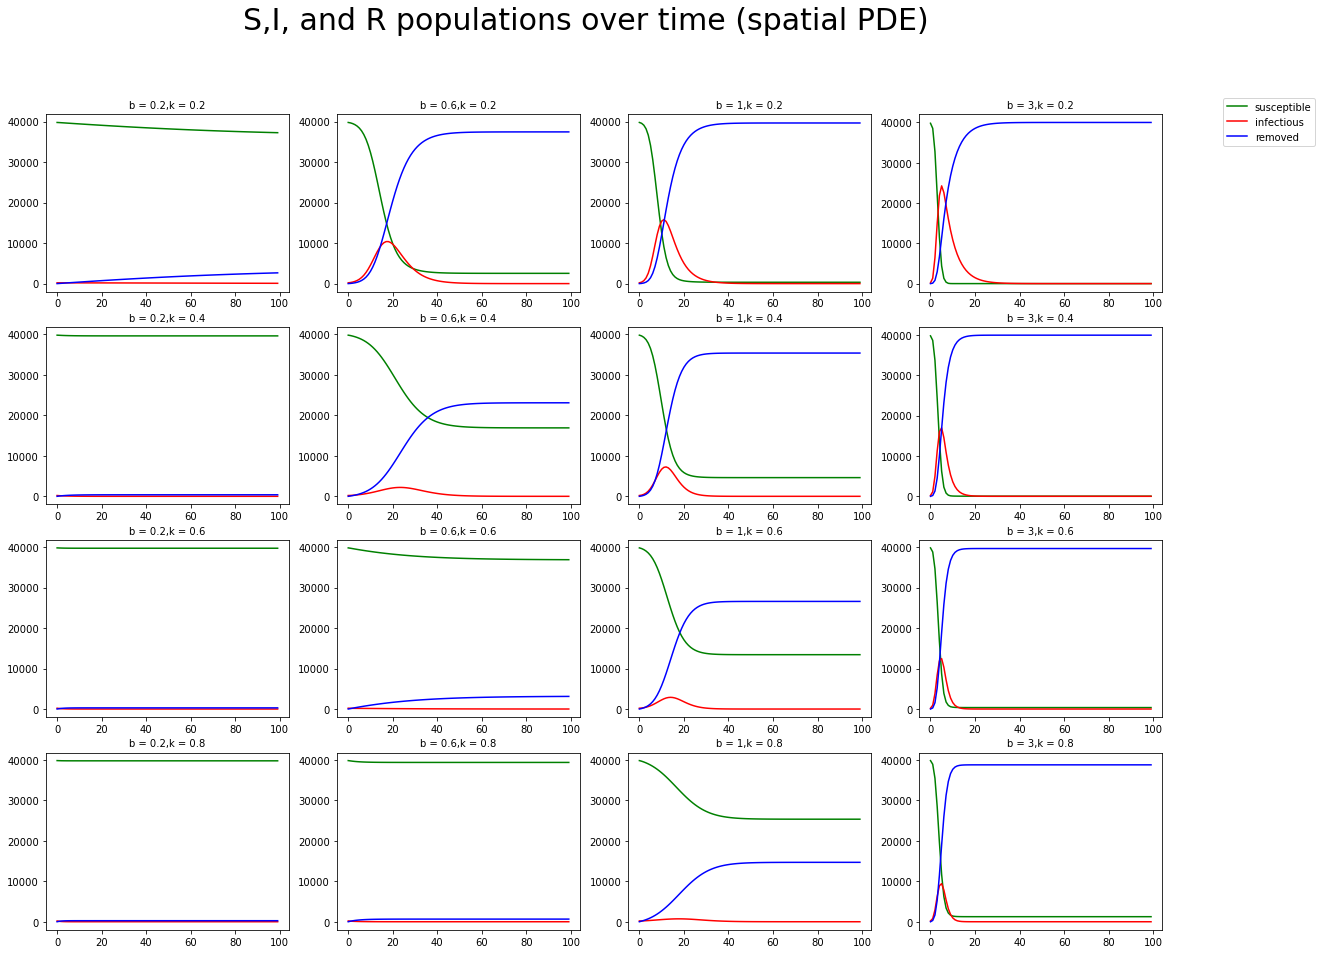

In [147]:
# useless trash
### script to plot s i r over time with different k and b

k_list = [1/5,2/5,3/5,4/5]
b_list = [1/5,3/5,1,3]

fig, ax = plt.subplots(len(k_list),len(b_list), figsize=(15,15))

M = 200
T = 100
# grids with 1s and 0s, 1s are the infected
i0 = M # number of the infected
I0 = np.random.choice([1]*i0+[0]*(M*M-i0), size=(M**2), replace=False)
p = 1

fig.suptitle("S,I, and R populations over time (spatial PDE)",fontsize=30)
for i,k in enumerate(k_list):
    for j,b in enumerate(b_list):
        
        sol = spatial_PDE(N,b,k,p,T,I0,M)
        
        S = []
        I = []
        R = []
        for dayind in range(T):
            S.append(np.sum(sol.y[:,dayind][:M**2]))
            I.append(np.sum(sol.y[:,dayind][M**2:-M**2]))
            R.append(np.sum(sol.y[:,dayind][-M**2:]))
        
        ax[i,j].plot(list(range(T)), S, label="susceptible", c='g')
        ax[i,j].plot(list(range(T)), I, label="infectious", c='r')
        ax[i,j].plot(list(range(T)), R, label="removed", c='b')
        
        ax[i,j].set_title(f"b = {b},k = {k}",fontsize=10)
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(1.01, 0.9),loc = 'upper right')